In [3]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import ipywidgets as wd



In [29]:
sharpen = np.array([(-0.5,-1.0,-0.5),
                    (-1.0,7.0,-1.0),
                    (-0.5,-1.0,-0.5)])

blur = np.array([(1/9,1/9,1/9),
                    (1/9,1/9,1/9),
                    (1/9,1/9,1/9)])
blur2 = np.full((5,5), 1/25)
blur3 = np.full((7,7), 1/49)

sobelV = np.array([(-0.125, 0.0, 0.125),(-0.25,0.0,0.25), (-0.125, 0.0, 0.125)])
sobelH = np.array([(-0.125, 0.0, 0.125),(-0.25,0.0,0.25), (-0.125, 0.0, 0.125)]).T # transpuesta
sobelD = np.array([(-0.125, -0.25, 0.0),
                   (-0.25, 0.0, 0.25), 
                   (0.0, 0.25, 0.125)])


In [ ]:
 
def filtrar(kernel,name='fallas.jpg', title="Filtro", size=(6,6)):
    """
    Toma una matriz y devuelve la convolución con la imagen
    entra ->  kernel::ndArray
              name::string (termina con la extensión del archivo en el directorio)
              title::string
 
    sale ->   matplotlib ax object
    """
    name = AbsPth+name # para uso en el sistema de directorios en el colab
    fig, ax = plt.subplots(1, figsize=size)
    image = cv2.imread(name,0)    
    #img = cv2.cvtColor(image, 2)    
    image = cv2.filter2D(image, -1, kernel)    
    plt.imshow(image,cmap="gray")
    plt.title(title)
    return ax

In [32]:
n = 100
from tqdm import tqdm

image = cv2.imread("olivino-color.jpg",1)  
image = image[0:200,0:200,:]
for i in tqdm(range(n)):
    image = cv2.filter2D(image, -1, sobelV) 
    image = cv2.filter2D(image, -1, blur) 
    cv2.imwrite(f"imagen-{i}.jpg", image)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 813.04it/s]


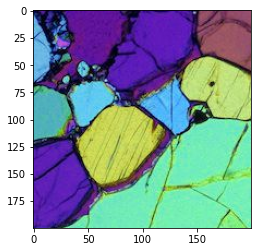